<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/machine-learning/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Q-Learning

Here ,we implement basic Q-learning alorithm where agent learns the optimal action-selection strategy to reach a goal state in a grid -like environment

# **Step 1: Define the Environment**

Set up the environment parameters including the number of states and actions and initialize the Q-table. In this each state represents a position and actions move the agent within this environment.

In [1]:
import numpy as np

n_states = 16
n_actions = 4
goal_state = 15

Q_table = np.zeros((n_states, n_actions))

# **Step 2: Set Hyperparameters**

Define the parameters for the Q-learning algorithm which include the learning rate, discount factor, exploration probability and the number of training epochs.

In [3]:
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
epochs = 1000

# **Step 3: Implement the Q-Learning Algorithm**

Perform the Q-learning algorithm over multiple epochs. Each epoch involves selecting actions based on an epsilon-greedy strategy updating Q-values based on rewards received and transitioning to the next state.

In [4]:
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)
    while current_state != goal_state:
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[current_state])

        next_state = (current_state + 1) % n_states

        reward = 1 if next_state == goal_state else 0

        Q_table[current_state, action] += learning_rate * \
            (reward + discount_factor *
             np.max(Q_table[next_state]) - Q_table[current_state, action])

        current_state = next_state

# **Step 4: Output the Learned Q-Table**

After training, print the Q-table to examine the learned Q-values which represent the expected rewards for taking specific actions in each state.

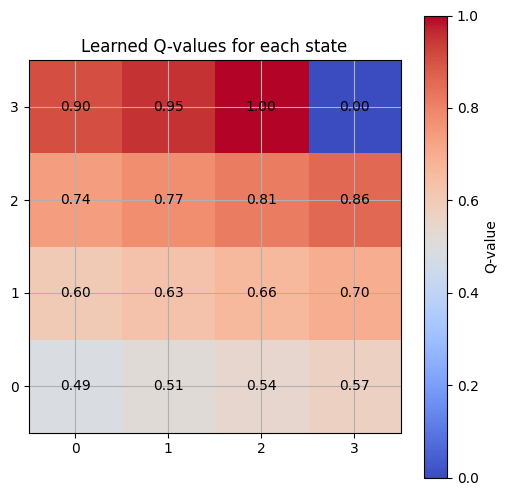

Learned Q-table:
[[0.48767498 0.46816569 0.48377358 0.4868947 ]
 [0.51334208 0.51333551 0.51317781 0.51333527]
 [0.54036009 0.5403587  0.54036003 0.5403255 ]
 [0.56880009 0.56880003 0.56880009 0.56880009]
 [0.59873694 0.59873694 0.59873694 0.59873694]
 [0.63024941 0.63024941 0.63024941 0.63024941]
 [0.66342043 0.66342043 0.66342043 0.66342043]
 [0.6983373  0.6983373  0.6983373  0.6983373 ]
 [0.73509189 0.73509189 0.73509189 0.73509189]
 [0.77378094 0.77378094 0.77378094 0.77378094]
 [0.81450625 0.81450625 0.81450625 0.81450625]
 [0.857375   0.857375   0.857375   0.857375  ]
 [0.9025     0.9025     0.9025     0.9025    ]
 [0.95       0.95       0.95       0.95      ]
 [1.         1.         1.         1.        ]
 [0.         0.         0.         0.        ]]


In [6]:
import matplotlib.pyplot as plt

# Extract Q-values for each state
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4))

# Plot the grid of Q-values
plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for each state')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()  # To match grid layout
plt.grid(True)

# Annotating the Q-values on the grid
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

# Print learned Q-table
print("Learned Q-table:")
print(Q_table)